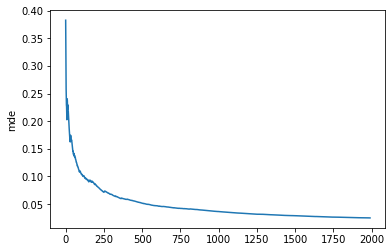

In [1]:
# Дисклеймер: в питоне есть пакет statsmodels, который позволяет рассчитать 
# MDE, выборку и остальные параметры
# в R тоже самое с пакетом pwr

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

N = 2000
n = int(N/2)
mu = 50 
lift = 1.1
pwr = 0.8 
alpha = 0.05
sigma = 10
mde = []

# Объявим тестовые данные
np.random.seed(1)
pd_df = pd.DataFrame({
    "val": np.concatenate([np.random.normal(mu, sigma, n), np.random.normal(mu*lift, sigma, n)]),
    "grp": np.concatenate([np.repeat("c",n),np.repeat("t",n)])
})
pd_df = pd_df.sample(frac=1)

# Кумулятивно считаем MDE в ходе эксперимента
for i in range(10,len(pd_df)):
    t = pd_df.iloc[:i, :]
    df = len(t) - 2 # степени свободы
    sd_t = np.std(t['val'][t['grp'] == 't'])
    sd_c = np.std(t['val'][t['grp'] == 'c'])
    n_t = len(t[t['grp'] == 't'])
    n_c = len(t[t['grp'] == 'c'])
    
    y_c = np.mean(t['val'][t['grp'] == 'c'])
    S = np.sqrt((sd_t**2 / n_t) + (sd_c**2 / n_c))
    M = scipy.stats.t.ppf(pwr, df) - scipy.stats.t.ppf(alpha / 2, df)  # расчет квантилей t-распределения
    
    mde.append(M * S / y_c)
    
plt.plot(mde)
plt.ylabel('mde')
plt.show()